In [22]:
from gensim.models.ldamodel import LdaModel
import gensim
import pandas as pd
import glob
from nltk.corpus import stopwords
import string
from gensim import corpora,models
from gensim.utils import lemmatize # Only keep nums
from gensim.corpora import Dictionary
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
import sys
import numpy as np

In [2]:
def process_text(content_list):
    """
    stopwords
    
    punctuation
    
    digits
    
    
    """
    typical_words = ['light','therapy','facial','treatment']
    stoplist = stopwords.words('english') + typical_words 
    
    remove_digits = str.maketrans('', '', string.digits)
    remove_punctuation = str.maketrans('', '', string.punctuation)
    
    
    lemma = WordNetLemmatizer()
    
    
    content_cleaned =[i.translate(remove_digits) for i in content_list]
    
    content_cleaned = [i.translate(remove_punctuation) for i in content_cleaned]
    
    content_cleaned = [[lemma.lemmatize(word.lower()) for word in line.split() 
                          if (word.lower() not in stoplist and len(word)>4)] for line in content_cleaned]

    return content_cleaned

In [3]:
content = pd.read_csv('text.csv',encoding = 'iso-8859-1',header=None)
content.columns = ['content']
content['content']
print(len(content))
content_list = content['content'].values
cleaned_list = process_text(content_list)

8001


In [4]:
#bigram = gensim.models.Phrases(cleaned_list,min_count=1, threshold=2)
#dictionary_text_list = list(bigram[cleaned_list])
#train_text_list = list(bigram[cleaned_list])
#dictionary = Dictionary(dictionary_text_list)
#corpus = [dictionary.doc2bow(text) for text in train_text_list]

In [5]:
dictionary = Dictionary(cleaned_list)
corpus = [dictionary.doc2bow(text) for text in cleaned_list]

In [6]:
num_topics = 10
lda = LdaModel(corpus, num_topics= num_topics,id2word = dictionary)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"skincare" + 0.020*"ultrasound" + 0.019*"benefit" + 0.018*"ultrasonic" + 0.017*"vbblogdirectory" + 0.016*"psoriasis" + 0.016*"treat" + 0.016*"violet" + 0.016*"system" + 0.015*"machine" + 0.015*"wrinkle" + 0.015*"suprlykgx" + 0.014*"theralight" + 0.013*"intensity" + 0.013*"condition"'),
 (1,
  '0.023*"skincare" + 0.017*"spot" + 0.012*"revive" + 0.011*"photofacial" + 0.010*"today" + 0.010*"treat" + 0.010*"rosacea" + 0.009*"complexion" + 0.009*"photorejuvenation" + 0.009*"essential" + 0.009*"freckle" + 0.008*"winter" + 0.008*"collagen" + 0.008*"industry" + 0.008*"relief"'),
 (2,
  '0.011*"issue" + 0.008*"larissacenter" + 0.007*"stdosrawcint" + 0.007*"needle" + 0.006*"downtime" + 0.006*"solution" + 0.006*"jerawat" + 0.006*"pictwittercomaojlvutcj" + 0.006*"dengan" + 0.006*"googlpexzmz" + 0.006*"readmore" + 0.006*"hilang" + 0.005*"whyuneedlighttherapy" + 0.005*"olivegold" + 0.005*"frequency"'),
 (3,
  '0.016*"beauty" + 0.014*"cosmetic" + 0.013*"device" + 0.013*"wrinkle" + 0.009

In [7]:
assign_dict = dict()
for i in range(len(corpus)):
        key = (sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][0])
        assign_dict[key] = assign_dict.get(key, []) + [sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][1]]

In [8]:
count_assign = []
conf_score = []
for key in assign_dict.keys():
    count = assign_dict.get(key, [])
    count_assign.append(len(count))
    conf_score.append(np.mean(count))

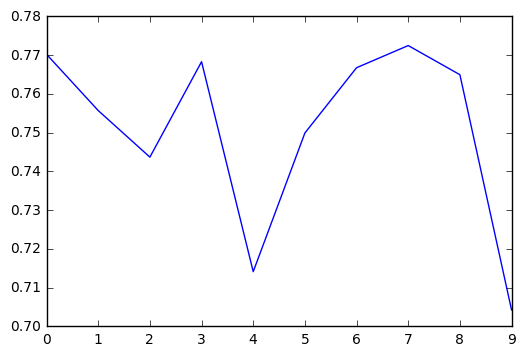

In [9]:
plt.plot(conf_score)

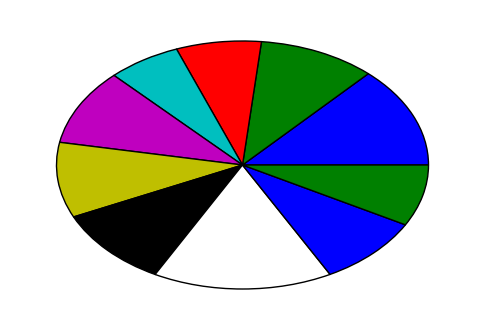

In [20]:
plt.pie(count_assign)
plt.figure(figsize = (5,5))

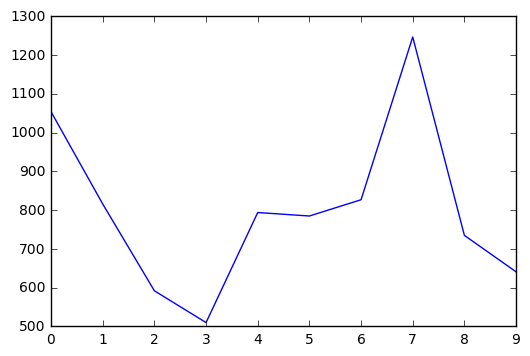

In [11]:
plt.plot(count_assign)

In [12]:
sum(count_assign)

8001

Now we try to use TFIDF

In [24]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
num_topics = 10
lda_tfidf = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"skincare" + 0.020*"ultrasound" + 0.019*"benefit" + 0.018*"ultrasonic" + 0.017*"vbblogdirectory" + 0.016*"psoriasis" + 0.016*"treat" + 0.016*"violet" + 0.016*"system" + 0.015*"machine" + 0.015*"wrinkle" + 0.015*"suprlykgx" + 0.014*"theralight" + 0.013*"intensity" + 0.013*"condition"'),
 (1,
  '0.023*"skincare" + 0.017*"spot" + 0.012*"revive" + 0.011*"photofacial" + 0.010*"today" + 0.010*"treat" + 0.010*"rosacea" + 0.009*"complexion" + 0.009*"photorejuvenation" + 0.009*"essential" + 0.009*"freckle" + 0.008*"winter" + 0.008*"collagen" + 0.008*"industry" + 0.008*"relief"'),
 (2,
  '0.011*"issue" + 0.008*"larissacenter" + 0.007*"stdosrawcint" + 0.007*"needle" + 0.006*"downtime" + 0.006*"solution" + 0.006*"jerawat" + 0.006*"pictwittercomaojlvutcj" + 0.006*"dengan" + 0.006*"googlpexzmz" + 0.006*"readmore" + 0.006*"hilang" + 0.005*"whyuneedlighttherapy" + 0.005*"olivegold" + 0.005*"frequency"'),
 (3,
  '0.016*"beauty" + 0.014*"cosmetic" + 0.013*"device" + 0.013*"wrinkle" + 0.009

In [115]:
assign_dict = dict()
for i in range(len(corpus_tfidf)):
        key = (sorted(lda_tfidf[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][0])
        assign_dict[key] = assign_dict.get(key, []) + [sorted(lda_tfidf[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][1]]
count_assign = []
conf_score = []
for key in assign_dict.keys():
    count = assign_dict.get(key, [])
    count_assign.append(len(count))
    conf_score.append(np.mean(count))

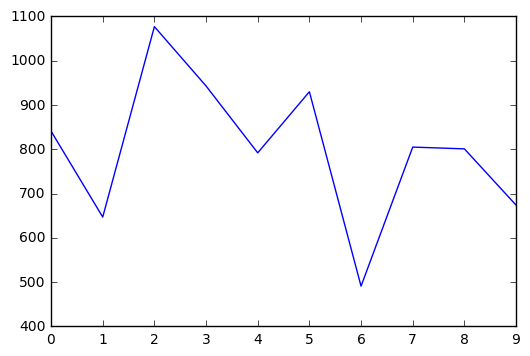

In [116]:
plt.plot(count_assign)

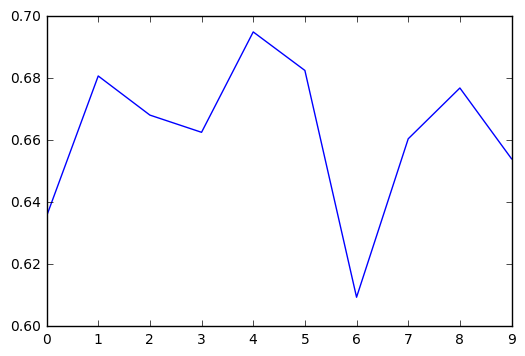

In [117]:
plt.plot(conf_score)

In [44]:
import nltk
import itertools
from collections import Counter
import operator

In [ ]:
corpus_with_pos = list(map(lambda x:nltk.pos_tag(x),cleaned_list))

In [49]:
sorted(dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items(),key=operator.itemgetter(1),reverse = True)

[('NN', 51755),
 ('JJ', 17201),
 ('VBG', 5201),
 ('VBD', 2693),
 ('RB', 2585),
 ('NNS', 2270),
 ('VBP', 1925),
 ('VBN', 1284),
 ('VB', 1117),
 ('IN', 902),
 ('VBZ', 743),
 ('JJR', 586),
 ('PRP', 413),
 ('JJS', 200),
 ('RBR', 187),
 ('MD', 172),
 ('CD', 158),
 ('FW', 137),
 ('DT', 104),
 ('NNP', 97),
 ('CC', 45),
 ('WRB', 44),
 ('EX', 12),
 ('WP', 11),
 ('RP', 8),
 ('WDT', 7),
 ('RBS', 6),
 ('POS', 5),
 ('WP$', 2),
 ('PRP$', 1)]

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


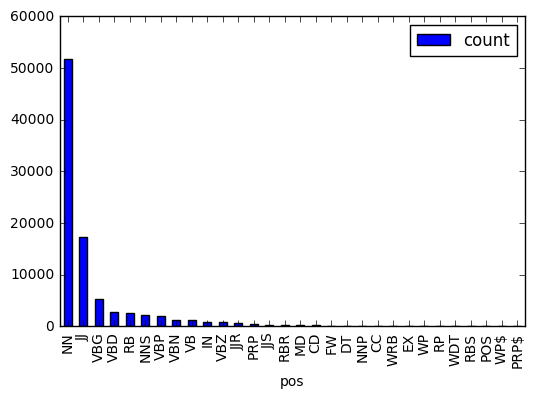

In [114]:
count_pos_dict = dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[])))))
pd.DataFrame({'count':list(count_pos_dict.values()),'pos':list(count_pos_dict.keys())}).set_index('pos').sort('count',ascending=False).plot(kind = 'bar')

In [50]:
keep_pos = ['JJ','JJS','JJR','NN','NNP','RB','VB','VBP','VBZ','RBR','VBD','VBN']

In [57]:
list(filter(lambda x: x[0] in keep_pos,dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items()))

[('VBN', 1284),
 ('RBR', 187),
 ('JJS', 200),
 ('VBD', 2693),
 ('VBZ', 743),
 ('JJR', 586),
 ('VBP', 1925),
 ('NN', 51755),
 ('VB', 1117),
 ('JJ', 17201),
 ('RB', 2585),
 ('NNP', 97)]

In [64]:
filtered_corpus_with_pos=[]
for i in corpus_with_pos:
    filtered_corpus_with_pos.append(list(filter(lambda x: x[1] in keep_pos,i)))

In [66]:
filtered_corpus_by_pos = []
for i in filtered_corpus_with_pos:
    filtered_corpus_by_pos.append(list(map(lambda x: x[0],i)))

In [72]:
dictionary_pos = Dictionary(filtered_corpus_by_pos)
corpus_pos = [dictionary_pos.doc2bow(text) for text in filtered_corpus_by_pos]

In [77]:
tfidf_by_pos = models.TfidfModel(corpus_pos)
corpus_by_pos_tfidf = tfidf_by_pos[corpus_pos]
num_topics = 10
lda_pos_tfidf = LdaModel(corpus_by_pos_tfidf, id2word=dictionary_pos, num_topics=num_topics)
lda_pos_tfidf.show_topics(num_topics,5)

[(0,
  '0.015*"ntgspokesperson" + 0.013*"oliviaholt" + 0.011*"score" + 0.011*"pictwittercomjgyecog" + 0.010*"theralight"'),
 (1,
  '0.123*"stop" + 0.122*"environment" + 0.118*"brighten" + 0.114*"panel" + 0.104*"energy"'),
 (2,
  '0.011*"think" + 0.007*"cell" + 0.007*"wavelength" + 0.007*"regenerate" + 0.006*"create"'),
 (3,
  '0.033*"theralightinccomlighttherapy" + 0.030*"rosacea" + 0.023*"suprlykgx" + 0.022*"vbblogdirectory" + 0.022*"benefit"'),
 (4,
  '0.009*"bluemd" + 0.008*"trophy" + 0.007*"spot" + 0.007*"trophyskincomproductsbluemd" + 0.007*"medeliene"'),
 (5,
  '0.013*"ultrasonic" + 0.010*"ultrasound" + 0.008*"intensity" + 0.008*"focused" + 0.008*"machine"'),
 (6,
  '0.012*"prevent" + 0.012*"supriiih" + 0.008*"beauty" + 0.008*"revive" + 0.007*"rejuvenation"'),
 (7,
  '0.012*"psoriasis" + 0.010*"condition" + 0.009*"vitiligo" + 0.009*"theralightinccomphysicianscl" + 0.009*"medicalgrade"'),
 (8,
  '0.012*"somacomskincarebenef" + 0.009*"violet" + 0.006*"healthbeautyitemsinfohlthbtytm

In [80]:
num_topics = 10
lda_pos = LdaModel(corpus_pos, id2word=dictionary_pos, num_topics=num_topics)
lda_pos.show_topics(num_topics,10)

[(0,
  '0.041*"photon" + 0.033*"rejuvenation" + 0.027*"color" + 0.019*"oliviaholt" + 0.019*"psoriasis" + 0.017*"ntgspokesperson" + 0.015*"treat" + 0.015*"beauty" + 0.014*"system" + 0.014*"neutrogena"'),
 (1,
  '0.034*"beauty" + 0.014*"skincare" + 0.012*"photon" + 0.012*"natural" + 0.011*"device" + 0.010*"issue" + 0.010*"wrinkle" + 0.010*"photofacial" + 0.009*"collagen" + 0.008*"rejuvenation"'),
 (2,
  '0.016*"spot" + 0.014*"photorejuvenation" + 0.014*"light" + 0.013*"rosacea" + 0.013*"photo" + 0.012*"photofacial" + 0.012*"treat" + 0.011*"thank" + 0.011*"laser" + 0.010*"goodness"'),
 (3,
  '0.015*"device" + 0.012*"review" + 0.010*"added" + 0.009*"sleep" + 0.009*"bluemd" + 0.007*"phototherapy" + 0.007*"salon" + 0.007*"machine" + 0.007*"equipment" + 0.007*"trophy"'),
 (4,
  '0.018*"wrinkle" + 0.015*"ultrasonic" + 0.014*"ultrasound" + 0.012*"cosmetic" + 0.011*"intensity" + 0.010*"beauty" + 0.010*"focused" + 0.010*"machine" + 0.009*"laser" + 0.008*"manhattan"'),
 (5,
  '0.118*"technology" +